# Plotting Nyquist plots of impedance spectra

Plotting a basically formated Nyquist plot is as easy as 1, 2, 3...

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../../')

from impedance.circuits import CustomCircuit


### 1. Read in data

In [2]:
data = np.genfromtxt('../../../data/exampleData.csv', delimiter=',')

frequencies = data[:,0]
Z = data[:,1] + 1j*data[:,2]

frequencies = frequencies[np.imag(Z) < 0]
Z = Z[np.imag(Z) < 0]

### 2. Fit a custom circuit

(If you want to just plot experimental data without fitting a model to it, you should check out the `plotting.plot_nyquist()` function)

In [3]:
circuit = CustomCircuit(initial_guess=[.01, .005, .1, .005, .1, .001, 200], circuit='R_0-p(R_1,C_1)-p(R_1,C_1)-W_1')

circuit.fit(frequencies, Z)

print(circuit)


-------------------------------
Circuit: None
Circuit string: R_0-p(R_1,C_1)-p(R_1,C_1)-W_1
Fit: True

-------------------------------
Fit parameters:
	R_0 = 1.65e-02 +/- 1.54e-04
	R_1 = 5.31e-03 +/- 2.06e-04
	C_1 = 2.32e-01 +/- 1.90e-02
	R_1 = 8.77e-03 +/- 1.89e-04
	C_1 = 3.28e+00 +/- 1.85e-01
	W_1_0 = 6.37e-02 +/- 2.03e-03
	W_1_1 = 2.37e+02 +/- 1.72e+01



### 3. Plot the data and fit model with confidence bounds

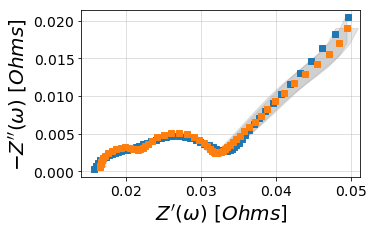

In [4]:
circuit.plot(f_data=frequencies, Z_data=Z, conf_bounds='filled')

### Bonus: Easy access to all the customization of matplotlib

Here we plot the data, changing the size of the figure, axes label fontsize, and turning off the grid by accessing the plt.Axes() object, ax


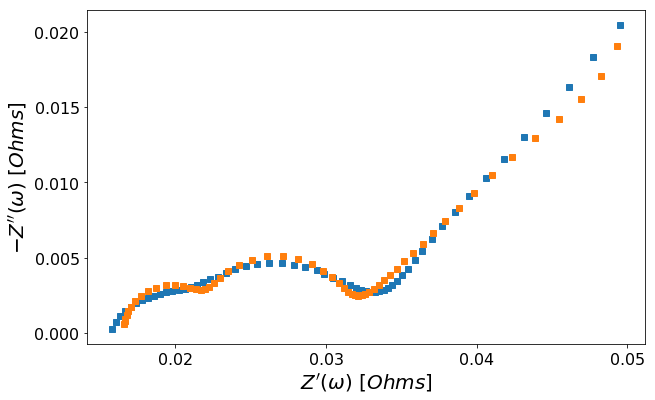

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
ax = circuit.plot(ax, frequencies, Z)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(False)

plt.show()